In [4]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 5000 
import yfinance as yf


In [57]:
data = yf.download(tickers='aapl', )
#Print data

Exception in thread Thread-8:
Traceback (most recent call last):
  File "/Users/paxton615/opt/anaconda3/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/Users/paxton615/opt/anaconda3/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/paxton615/opt/anaconda3/lib/python3.8/site-packages/multitasking/__init__.py", line 102, in _run_via_pool
    return callee(*args, **kwargs)
  File "/Users/paxton615/opt/anaconda3/lib/python3.8/site-packages/yfinance/multi.py", line 166, in _download_one_threaded
    data = _download_one(ticker, start, end, auto_adjust, back_adjust,
  File "/Users/paxton615/opt/anaconda3/lib/python3.8/site-packages/yfinance/multi.py", line 178, in _download_one
    return Ticker(ticker).history(period=period, interval=interval,
  File "/Users/paxton615/opt/anaconda3/lib/python3.8/site-packages/yfinance/base.py", line 156, in history
    data = data.json()
  File "/Users/paxton615/opt/

KeyboardInterrupt: 

In [ ]:
data

In [18]:
# Load the data online or offline

cgh_data = web.DataReader('CGH.L', 'av-daily', start=datetime(2020, 1, 2), end=datetime(2021, 7, 28), api_key='EUWPYIBX33PPD5U5')
data = cgh_data 

In [20]:
data.to_csv(r'/Users/paxton615/Desktop/CGH_csv.csv')

In [22]:
df = data

In [36]:
df_p1_sprice = 26
# df_p1_wprice = 1
# df_p2_sprice = 1.3
# df_p2_wprice = 2
df_p1_date = '2021-02-01'
df_p1_fund = 5000

In [33]:
# 1st placing price is 0.5, date '2020-04-01'
df['p1_sprice'] = [df_p1_sprice if i  >= df_p1_date else None for i in df.index]


In [31]:
# plt.figure(figsize=(12,10))
# df.close.plot()
# df.p1_sprice.plot();

In [37]:
df['p1_sposition'] = [df_p1_fund/df_p1_sprice if i >= df_p1_date else None for i in df.index]
# df['p1_wposition'] = df['p1_sposition']


In [39]:
df['p1_sprft'] = df.close - df['p1_sprice']


In [41]:
df.fillna(0.0, inplace=True)

In [44]:
df['per_pw_prft'] = df['p1_sprft'] 

In [43]:
df['total_prft'] = 192.307692 * df['p1_sprft'] 

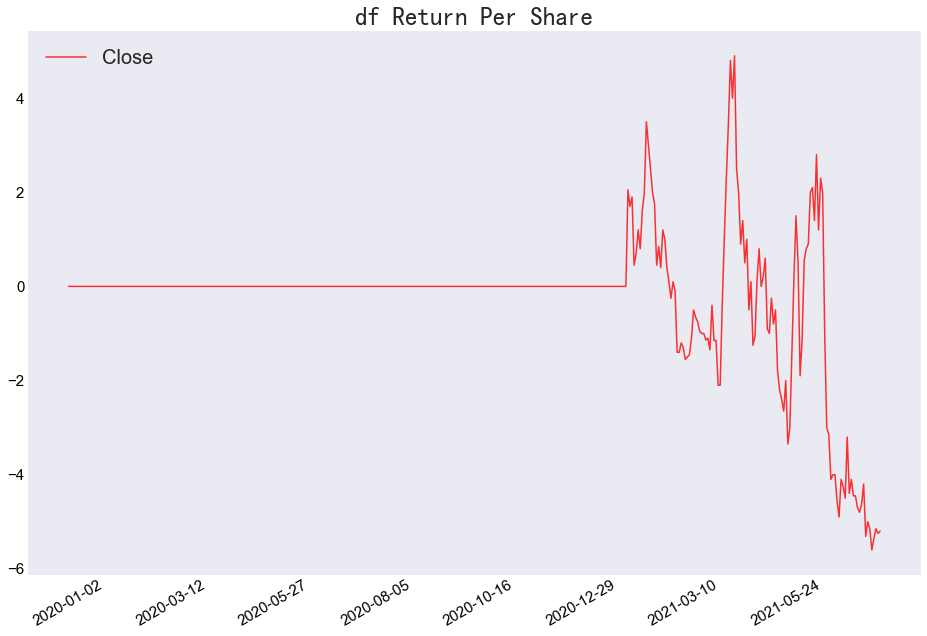

In [47]:
plt.figure(figsize=(16,10))
plt.style.use('seaborn-dark')
# df.close.plot()
df.per_pw_prft.plot(color='r', alpha=0.8)
plt.yticks(fontsize=15,color='k')
plt.xticks( fontsize=15,color='k', rotation=30)
plt.title('df Return Per Share', fontproperties = 'SimHei',fontsize=25)
plt.legend(('Close','Return'),loc="upper left", fontsize=20 );

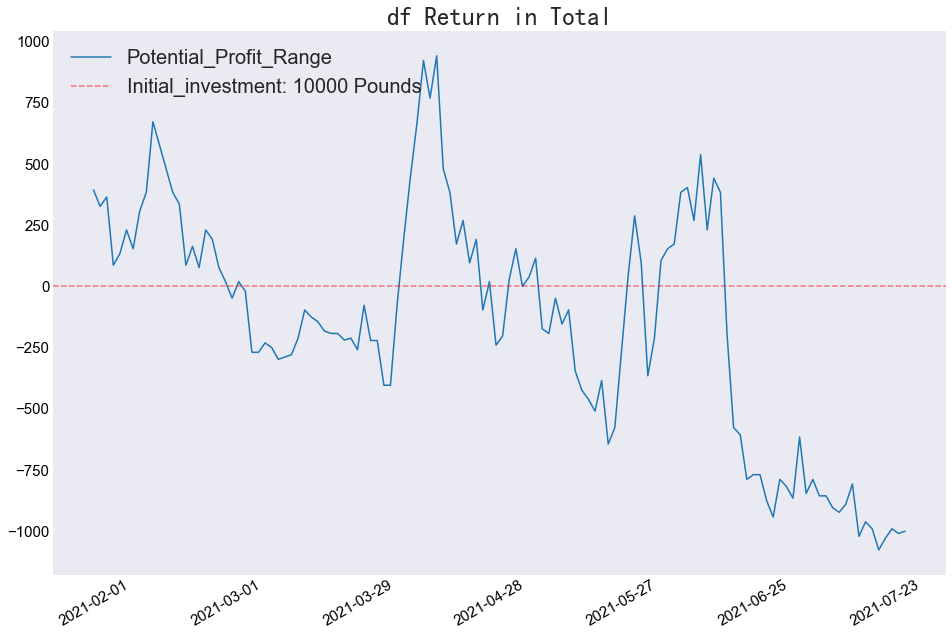

In [50]:
plt.figure(figsize=(16,10))
df.loc[df.index >= df_p1_date].total_prft.plot();
plt.axhline(y=0, color='r', linestyle='dashed', alpha=0.5)
# plt.axhline(y=20000, color='k', linestyle='dashed', alpha=0.1)
# plt.axhline(y=40000, color='k', linestyle='dashed', alpha=0.1)
# plt.axhline(y=60000, color='k', linestyle='dashed', alpha=0.1)
# plt.axhline(y=80000, color='k', linestyle='dashed', alpha=0.1)
plt.yticks(fontsize=15,color='k')
plt.xticks( fontsize=15,color='k', rotation=30)
plt.legend(('Potential_Profit_Range','Initial_investment: 10000 Pounds'),loc="upper left", fontsize=20 )
plt.title('df Return in Total', fontproperties = 'SimHei',fontsize=25)
# plt.text(datetime(2020,1,2), 10000, '123', fontproperties = 'SimHei',fontsize=18)
plt.show()

In [45]:
df

,open,high,low,close,volume,p1_sprice,p1_sposition,p1_sprft,total_prft,per_pw_prft
2020-01-02,34.8940,35.6500,34.8940,35.2000,36415,0.0,0.000000,0.0000,0.000000,0.0000
2020-01-03,35.6970,35.6970,35.6970,35.6970,560,0.0,0.000000,0.0000,0.000000,0.0000
2020-01-06,35.0000,36.2000,34.8000,36.0000,285326,0.0,0.000000,0.0000,0.000000,0.0000
2020-01-07,35.4000,36.0000,35.4000,36.0000,259323,0.0,0.000000,0.0000,0.000000,0.0000
2020-01-08,35.8000,36.7879,35.8000,36.1000,20543,0.0,0.000000,0.0000,0.000000,0.0000
2020-01-09,36.0000,36.7919,35.8000,36.3000,210795,0.0,0.000000,0.0000,0.000000,0.0000
2020-01-10,36.8000,37.1940,36.4000,36.8000,139285,0.0,0.000000,0.0000,0.000000,0.0000
2020-01-13,37.6000,38.0000,37.5940,37.9000,88000,0.0,0.000000,0.0000,0.000000,0.0000
2020-01-14,38.0000,38.0000,37.2000,37.5000,428106,0.0,0.000000,0.0000,0.000000,0.0000
2020-01-15,37.2000,37.2000,35.4000,35.8000,497650,0.0,0.000000,0.0000,0.000000,0.0000
